# Clustering customers for segmentation

the goal of this notebook is to achieve clustering and to use understandable variables

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Quicklook at the data
It's interesting to look at the integrity of the data before doing any other operation.
And also to look at the shape of the distribution of the different data.

In [31]:
df = pd.read_csv('Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

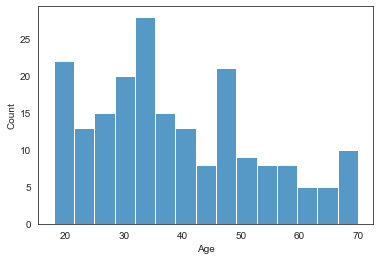

In [51]:
sns.histplot(df.Age,bins=15)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

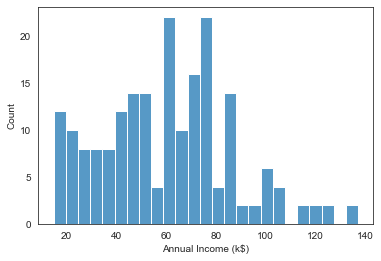

In [34]:
sns.histplot(df['Annual Income (k$)'],bins=25)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

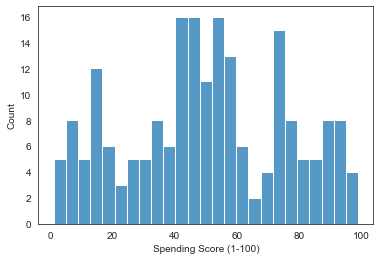

In [35]:
sns.histplot(df['Spending Score (1-100)'],bins=25)

### Clustering
To start clustering we will choose only data, Genre and Id being categorical will not be used.

In [36]:
X =  df.drop(['CustomerID','Genre'],axis=1).values

#### Elbow technique
For finindg the optimal number of cluster we can use elbow technique.<br> 
Graph resolution of the point of inflexion in the inertia plot.

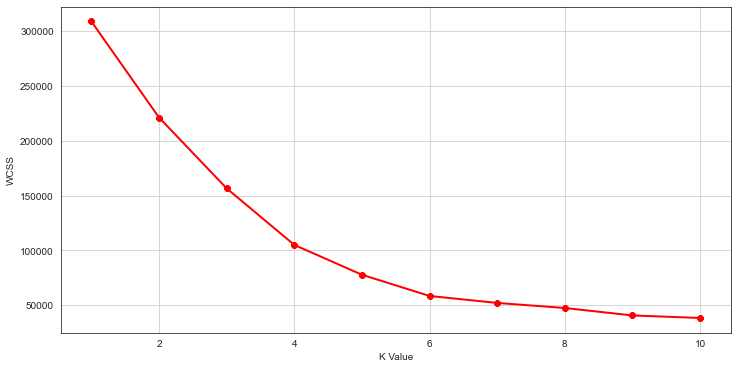

In [37]:
from sklearn.cluster  import MiniBatchKMeans

wcss = []

for i in range(1,11):
    model = MiniBatchKMeans(n_clusters=i, init="k-means++")
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#### Silhouette technique

The best silhouette score will enable the best clustering.

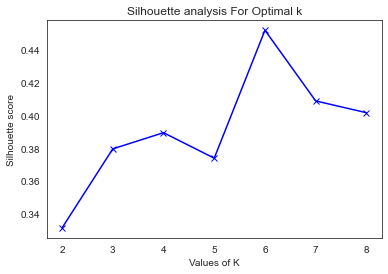

In [38]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = MiniBatchKMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

#### K-means with optimal number of clusters

In [39]:
model = MiniBatchKMeans(n_clusters=5, init="k-means++")
label = model.fit_predict(X)

In [40]:
df['label']= label
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


### Representation

The main problem with K-mean is the representation.<br>
Here we can use 3d plot or selecting 2d plots, but with higher dimensionality it's better to use PCA.<br>
With PCA you'll try to find the componnents that express the maximum of variance within the scope of representability.

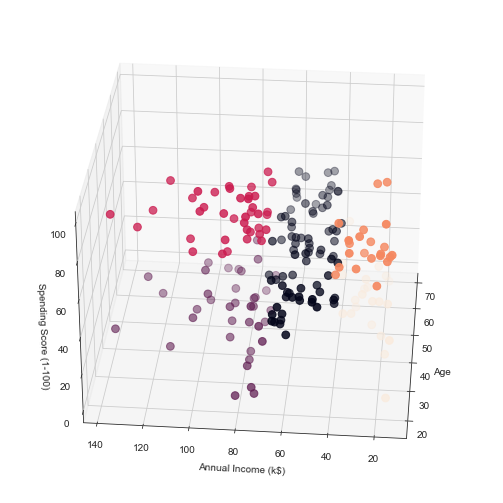

In [41]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c=label, s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

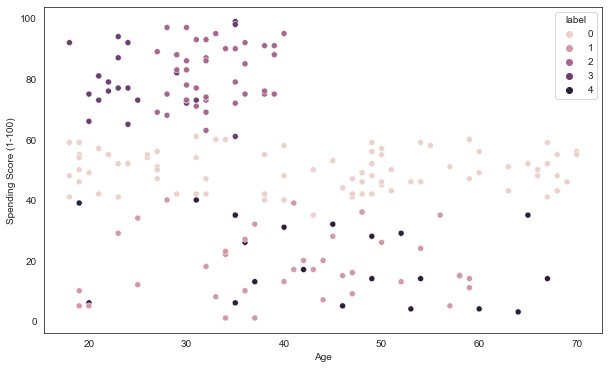

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.Age,y=df["Spending Score (1-100)"], hue='label', data=df)
plt.show()

This next 2d plot show the dimension where clusters appears at their best.

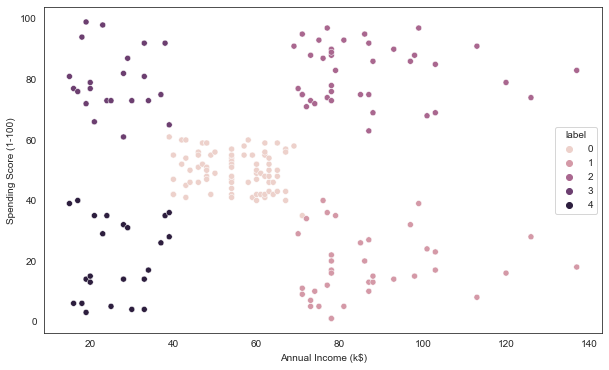

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'],y=df["Spending Score (1-100)"], hue='label', data=df)
plt.show()

## Description Customer segmentation using K-means 

Here we group by label and aggregate by mean to get a descripton of each label

In [44]:
A = df.groupby('label').mean().iloc[:,1:]
A

,Age,Annual Income (k$),Spending Score (1-100)
label,,,
0,43.126582,54.822785,49.835443
1,40.324324,87.432432,18.189189
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [50]:
B = df.groupby('label').median().iloc[:,1:]
B

,Age,Annual Income (k$),Spending Score (1-100)
label,,,
0,47.0,54.0,50.0
1,41.0,81.0,16.0
2,32.0,79.0,83.0
3,23.5,24.5,77.0
4,46.0,25.0,17.0


### Designation of a cluster for a new customer

In [55]:
new_label =model.predict([[45, 70, 20]])
print('The new customer is in group:',new_label)

The new customer is in group: [1]
